In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [127]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("calories.csv")

In [8]:
df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [9]:
df2 = pd.read_csv("exercise.csv")

In [10]:
df2

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [11]:
cal_df = df2.merge(df,on="User_ID")

In [12]:
cal_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [13]:
cal_df.shape

(15000, 9)

In [14]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [15]:
cal_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [16]:
cal_df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## EDA

In [17]:
sns.set()

C:\Users\jagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


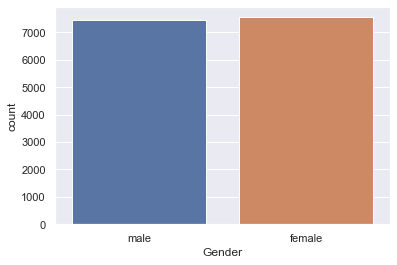

In [18]:
sns.countplot(cal_df["Gender"])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

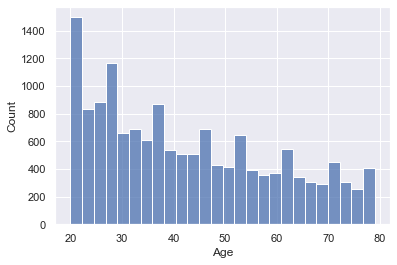

In [19]:
sns.histplot(cal_df["Age"])

<AxesSubplot:xlabel='Duration', ylabel='Count'>

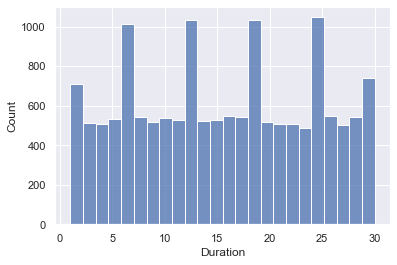

In [20]:
sns.histplot(cal_df["Duration"])

C:\Users\jagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

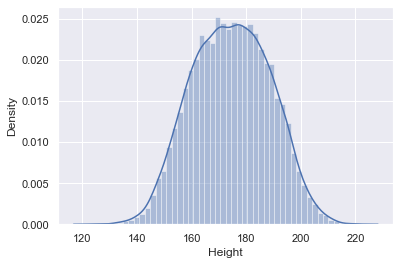

In [21]:
sns.distplot(cal_df["Height"])

C:\Users\jagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

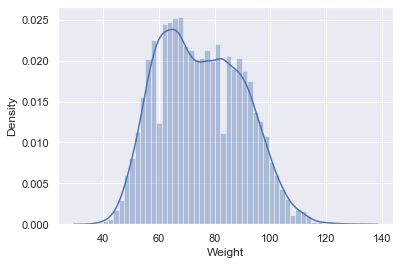

In [22]:
sns.distplot(cal_df["Weight"])

In [23]:
gen = {"male":0,"female":1}
cal_df["Gender"] = cal_df["Gender"].map(gen)

In [24]:
cal_df = cal_df.drop("User_ID",axis=1)

<AxesSubplot:>

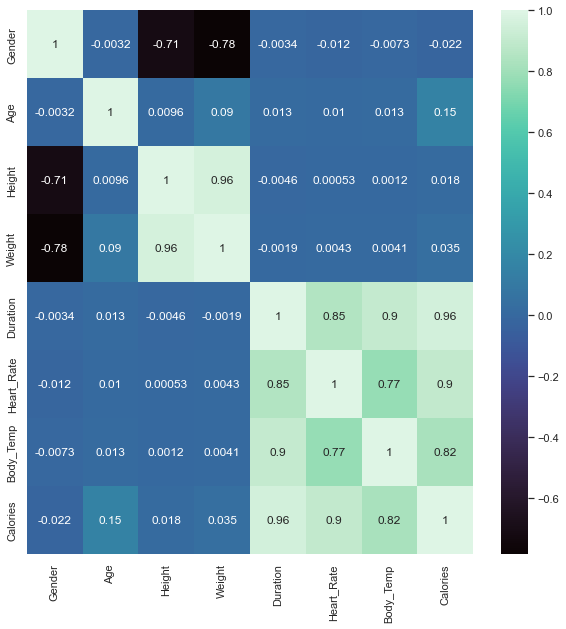

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(cal_df.corr(),annot=True,cmap="mako")

In [26]:
cal_df.head(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [143]:
X=cal_df.drop("Calories",axis=1).values

In [144]:
y=cal_df["Calories"]

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=120)

In [146]:
modelling = {"linear_regression":
         {"model":LinearRegression(),
         "parameters":{"normalize":[True,False]}
         },
         "Randomforest":
         {"model":RandomForestRegressor(),
          "parameters":{"n_estimators":[50,100,150,200],"max_depth":np.arange(6,30,6),"max_samples":[5,10]}
         },
         "Xgboost":
         {"model":XGBRegressor(),
          "parameters": {"n_estimators":[200,500]}}

        }

In [147]:
models =[]
scores=[]
for key,value in modelling.items():
    evolve = GridSearchCV(estimator = value["model"],param_grid= value["parameters"],cv=5,scoring = "neg_mean_squared_error")
    models.append(key)
    evolve.fit(X,y)
    scores.append(evolve.best_score_)
 

In [148]:
evolve.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [149]:
final_model = XGBRegressor()

In [152]:
cross_val_score

array([0.99881292, 0.99883402, 0.99892573, 0.99870655, 0.99881642])

In [153]:
final_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [154]:
y_pred = final_model.predict(X_test)
r2=metrics.r2_score(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)
print("r2_score",r2)
print("mse",mse)
print("mae",mae)

r2_score 0.9989324967161645
mse 4.260079871987205
mae 1.4041763718724252


<AxesSubplot:xlabel='Calories'>

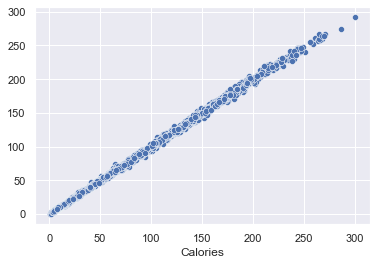

In [155]:
sns.scatterplot(y_test,y_pred)

<AxesSubplot:xlabel='Calories', ylabel='Calories'>

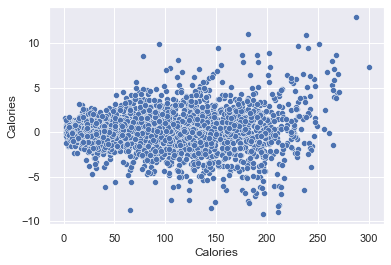

In [156]:
sns.scatterplot(y_test,y_test-y_pred)

In [160]:
import pickle
pickle.dump(final_model,open("model.pkl","wb"))

In [159]:
final_model.predict([[0,68,190,94,29,105,40.8]])[0]

230.23782